In [2]:
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

In [3]:
confirmed = pd.read_csv('datasets/confirmed_transposed.csv', index_col=0)
deaths = pd.read_csv('datasets/deaths_transposed.csv', index_col=0)
recovered = pd.read_csv('datasets/recovered_transposed.csv', index_col=0)

In [24]:
plots = {}

In [17]:
def over_threshold(df, threshold):
    confirmed_filtered = confirmed.iloc[-1]
    mask = (confirmed.iloc[-1] > threshold).index[confirmed.iloc[-1] > threshold]
    confirmed_over_threshold = confirmed[mask]
    return confirmed_over_threshold

In [27]:
threshold = 100
confirmed_over_threshold = over_threshold(confirmed, threshold)

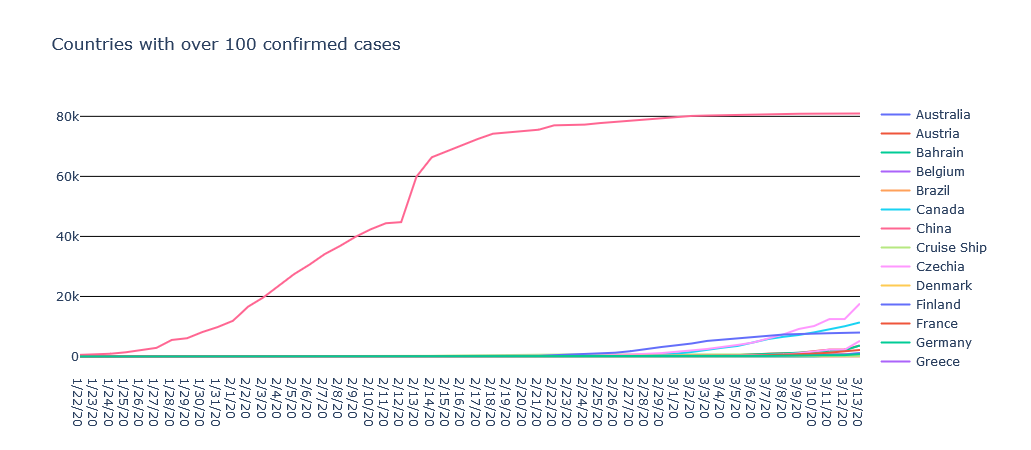

In [40]:
import plotly.graph_objects as go
fig = go.Figure(
    layout=go.Layout(
        title=go.layout.Title(text=f'Countries with over {threshold} confirmed cases'),
        plot_bgcolor='rgb(255,255,255)'
    )
)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Black')
fig.update_xaxes(showgrid=False)

for column in confirmed_over_threshold:
    fig.add_trace(go.Scatter(
        x=confirmed_over_threshold[column].index, 
        y=confirmed_over_threshold[column].values,
        name=column))
fig.show()

In [29]:
plots = {}